# LTFS loan default prediction

## Problem Statement

* To predict Loan Default based on various parameters, using ClassificationAlgos on L&T Finance Loan dataset

## Data definition

- This dataset contains various parameters for every loan sanctioned such as, Loan ID, Amount disbursed, LTV, employment type of customer, whether all documents supplied or not, length of account etc.
- Data set contains 233154 records and 41 columns in the train data set and 112393 records and 40 columns in test data set. Data description is as follows:
- UniqueID	- Loan ID
- disbursed_amount	- Total amount disbursed
- asset_cost	- Purchase cost of vehicle
- ltv	- Loan to value ration
- branch_id	- ID of the branch of loan
- supplier_id	- ID of supplier of vehicle
- manufacturer_id	- ID of manufacturer of vehicle
- Current_pincode_ID	- Pincode of borrower
- Date.of.Birth	- DOB of borrower
- Employment.Type	- Employment type of borrower
- DisbursalDate	- Date of disbursement of loan
- State_ID	- State code of borrower
- Employee_code_ID	- Employment code of borrower
- MobileNo_Avl_Flag	- Mobile present or not
- Aadhar_flag	- Aadhar present or not
- PAN_flag	- PAN present or not
- VoterID_flag	- Voter ID present or not
- Driving_flag	- Driving license present or not
- Passport_flag	- Passport present or not
- PERFORM_CNS.SCORE	- Credit score of LnT
- PERFORM_CNS.SCORE.DESCRIPTION - Description based on CNS Score
- PRI.NO.OF.ACCTS 	- Primary no. of accounts (Primary indicates accounts where customer is borrower)
- PRI.ACTIVE.ACCTS 	- Active primary accounts
- PRI.OVERDUE.ACCTS	- Overdue primary accounts
- PRI.CURRENT.BALANCE	- Balance in primary accounts
- PRI.SANCTIONED.AMOUNT	- Sanctioned amount of primary accounts
- PRI.DISBURSED.AMOUNT	- Disbursed amount in primary accounts
- SEC.NO.OF.ACCTS		- Secondary no. of accounts (Secondary indicates accounts where customer is co-applicant/guarantor)
- SEC.ACTIVE.ACCTS	- Active secondary accounts
- SEC.OVERDUE.ACCTS	- Overdue secondary accounts
- SEC.CURRENT.BALANCE	- Balance in secondary accounts
- SEC.SANCTIONED.AMOUNT	- Sanctioned amount of secondary accounts
- SEC.DISBURSED.AMOUNT	- Disbursed amount in secondary accounts
- PRIMARY.INSTAL.AMT	- Installments in primary accts.
- SEC.INSTAL.AMT		- Installments in secondary accts.
- NEW.ACCTS.IN.LAST.SIX.MONTHS	- No. of loan accounts opened in last 6 months
- DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS	- No. of delinquent loan accounts in last 6 months
- AVERAGE.ACCT.AGE	- Average age of accounts
- CREDIT.HISTORY.LENGTH	- History of credit of borrower (since first loan)
- NO.OF_INQUIRIES		- Total no. of enquiries made for loan

- All metrics are calculated at the time of application to L&T

## Preparing Environment

### Importing packages

In [1]:
# EDA Packages

import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime as dt

#Modelling packages
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

#Evaluation packages
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, plot_roc_curve, accuracy_score

### Custom functions for EDA & Modelling

In [2]:
#1. To format all column names
def column_name_format(columns):
    """
    Takes list of column names from a Dataframe as input and formats it
    Returns the formatted columns name list
    """
    columns = columns.str.lower() #Converting to lower case
    columns = columns.str.replace(",","_").str.replace(".","_").str.replace("/","_").str.replace(";","_").str.replace(":","_").str.replace("&","_").str.replace("'","")
    #Removing most special characters and replacing it with '-'
    return columns

#2. To calculate Age from any given DOB
def calculate_age(dob):
    """
    Takes Date of Birth in dd/mm/yyyy format and calculates age
    """
    year = pd.to_datetime(dob).year
    if(year > 2019):
        return(dt.now().year - (year - 100))
    else:
        return(dt.now().year - year)

### Importing dataset

In [3]:
df = pd.read_csv("train.csv", low_memory= False, parse_dates=["Date.of.Birth","DisbursalDate"])
df.head().T

,0,1,2,3,4
UniqueID,420825,537409,417566,624493,539055
disbursed_amount,50578,47145,53278,57513,52378
asset_cost,58400,65550,61360,66113,60300
ltv,89.55,73.23,89.63,88.48,88.39
branch_id,67,67,67,67,67
supplier_id,22807,22807,22807,22807,22807
manufacturer_id,45,45,45,45,45
Current_pincode_ID,1441,1502,1497,1501,1495
Date.of.Birth,1984-01-01 00:00:00,1985-07-31 00:00:00,1985-08-24 00:00:00,1993-12-30 00:00:00,1977-09-12 00:00:00
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed


### EDA in single cell

In [4]:
%%time

def lnt_preprocess(df):
    """
    Complete EDA of LnTFS data which does following:
    1. Changes column names to lowes case and removes special characters
    2. Computes "age" from DOB column
    3. Fills missing values in "employment_type" column with others
    4. Computes KYC Score with all available KYC flags
    5. Bins "perform_cns_score_description" column in to 6 buckets
    6. Computes total no. of accounts with primary account numbers and secondary account numbers
    7. Drops all unnecessary columns
    8. Returns the data fram
    """

    #formatting columns
    df.columns = column_name_format(df.columns)

    #calculating age from DOB
    df["age"] = df["date_of_birth"].apply(calculate_age)

    #Filling NA values in Employment_type with "Others"
    df["employment_type"].fillna(value= "others", inplace=True)

    #Deriving at KYC_Sscore by summing up all available KYC flags
    df['kyc_score'] = df.aadhar_flag.astype('int') + df.pan_flag.astype('int') + df.voterid_flag.astype('int') + df.driving_flag.astype('int') + df.passport_flag.astype('int')

    #Bucketing Credit Score description into generalized bins
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('No Bureau History Available', 'No History')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('Not Scored: Sufficient History Not Available', 'No History')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('Not Scored: Not Enough Info available on the customer', 'No History')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('Not Scored: No Activity seen on the customer (Inactive)','No History')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('Not Scored: No Updates available in last 36 months', 'No History')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('Not Scored: Only a Guarantor', 'No History')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('Not Scored: More than 50 active Accounts found','Very High')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('M-Very High Risk', 'Very High')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('L-Very High Risk', 'Very High')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('K-High Risk', 'High')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('J-High Risk', 'High')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('I-Medium Risk', 'Medium')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('H-Medium Risk', 'Medium')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('G-Low Risk', 'Low')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('F-Low Risk', 'Low')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('E-Low Risk', 'Low')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('D-Very Low Risk', 'Very Low')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('C-Very Low Risk', 'Very Low')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('B-Very Low Risk', 'Very Low')
    df['perform_cns_score_description'] = df['perform_cns_score_description'].replace('A-Very Low Risk', 'Very Low')

    #Primary accounts - accounts where customer is borrower/applicant
    #Secondary accounts - accounts where customer is co-borrower/co-applicant/guarantor
    #But credit score is affected by both primary & secondary accounts - so we can combine them into total accounts
    df['total_no_of_accts'] = df.pri_no_of_accts.astype('int') + df.sec_no_of_accts.astype('int')
    df['total_active_accts'] = df.pri_active_accts.astype('int') + df.sec_active_accts.astype('int')
    df['total_overdue_accts'] = df.pri_overdue_accts.astype('int') + df.sec_overdue_accts.astype('int')
    df['total_current_accts'] = df.pri_current_balance.astype('int') + df.sec_current_balance.astype('int')
    df['total_disbursed_amount'] = df.pri_disbursed_amount.astype('int') + df.sec_disbursed_amount.astype('int')
    df['total_instal_amt'] = df.primary_instal_amt.astype('int') + df.sec_instal_amt.astype('int')

    #Converting categorical values into numerical months - avg. account age & credit history length
    df['average_acct_age_mon'] = df['average_acct_age'].apply(lambda x: int(x.split(" ")[0][:-3])*12+int(x.split(" ")[1][:-3]))
    df['credit_history_length_mon'] = df['credit_history_length'].apply(lambda x: int(x.split(" ")[0][:-3])*12+int(x.split(" ")[1][:-3]))

    #Dropping irrelevant, redundant variables
    df.drop(["uniqueid", "mobileno_avl_flag", "aadhar_flag", "pan_flag",
             "voterid_flag", "driving_flag", "passport_flag", "date_of_birth", "average_acct_age", "credit_history_length",
            "disbursaldate"], axis=1, inplace = True)

    #Dropping outliers in Loan Disbursed Amount
    #As 95% of the data values lie within Rs. 1.00 lakh we may drop values above this threshold
    df.drop(df[df.disbursed_amount > 100000].index,inplace=True)
    
    return df

Wall time: 0 ns


In [5]:
#Binning 'Disbursed_Date' to check during which tenure default loans were sanctioned in maximum
#title= "Disbursed date distribution for defaulted loans"
#fig, ax = plt.subplots(figsize= (15,6), edgecolor = 'grey', linewidth= 5)
#ax.hist(df[df["loan_default"]==1]["disbursaldate"], bins = 50,);

#ax.set(xlabel="Sanctioned Yr/Mon", ylabel="No. of defaults",)
#ax.set_xlim(["2018-01","2018-12"])
#ax.set_ylim([100, 9000])
#ax.axhline(y=8500, ls='dashed')
#ax.set_title(title)
#fig.savefig(my_path + "\\saved_plots\\" + title + ".png");

In [49]:
def lnt_visualization(df):
    """
    Creates a folder "saved_plots" and dumps 7 graphs as follows:
    1. Age distribution of defaulters
    2. Default spread over loan amount and LTV
    3. Employment_Type vs. Loan_Default
    4. KYC Score impact on loan default
    5. KYC Score_Sanctioned vs Default
    6. Loan default distribution - Age and KYC Score buckets
    7. Top 30 default branches
    """
    my_path = os.getcwd()
    my_folder = my_path + "\\saved_plots"
    if not os.path.isdir(my_folder):
        os.mkdir("saved_plots")    
    
    #Distribution of Employment Type and Loan Default
    title = "Employment_Type vs. Loan_Default"
    pd.crosstab(df.employment_type, df.loan_default).plot(kind = 'bar',
                                                         figsize=(10,6),
                                                         color= ['lightblue', 'salmon'])
    plt.legend(labels = ['Standard', 'Default'])
    plt.title(title)
    plt.xlabel("Employment Type of Customers")
    plt.savefig(my_path + "\\saved_plots\\" + title + ".png")
    
    #Distribution of Age with Loan Default
    title = "Age distribution of defaulters"
    df[df.loan_default == 1]["age"].plot(kind= 'hist',
                                         bins = 20,
                                        figsize= (15,6),
                                        color= ['teal'])
    plt.title(title)
    plt.xlabel("Age of borrowers")
    plt.xticks(np.arange(20,70,step = 3))
    plt.savefig(my_path + "\\saved_plots\\" + title + ".png")
    
    #Spread of loan default across LTV values
    title = "Loan default distribution - Age and KYC Score buckets"
    plt.figure(figsize=(15,8))
    plt.scatter(df.age[df["loan_default"]==1], df.ltv[df["loan_default"]== 1], color= 'salmon', marker=".")
    plt.scatter(df.age[df["loan_default"]==0], df.ltv[df["loan_default"]== 0], color= 'silver', marker="." )
    plt.title(title)
    plt.xlabel("Age")
    plt.ylabel("LTV")
    plt.xticks(np.arange(20,70, step=5))
    plt.yticks(np.arange(20,100, step = 10))
    plt.legend(["Default", "Standard"])
    plt.savefig(my_path + "\\saved_plots\\" + title + ".png")
    
    #Plotting top 30 branches where default is high
    title = "Top 30 default branches"
    df[df["loan_default"] == 1].groupby(
                                        by = df["branch_id"], 
                                        sort= True, 
                                        squeeze= True
                                        )["loan_default"].count().sort_values(ascending= False)[:30].plot(
                                                                                                        kind = "bar",
                                                                                                        figsize= (20,7), 
                                                                                                        color = "salmon", 
                                                                                                        )
    plt.title(title, fontdict = {'fontsize': 20})
    plt.ylabel("No. of default", fontdict = {'fontsize' : 15})
    plt.xlabel("Branch ID", fontdict = {'fontsize' : 15})
    plt.xticks()
    plt.savefig(my_path + "\\saved_plots\\" + title + ".png");
    
    
    #Plotting loan default against KYC Scores
    title = "KYC Score impact on loan default"
    df[df["loan_default"] == 1].groupby(by=df.kyc_score,
                                        sort = True,
                                        )["loan_default"].count().plot(kind = 'line',
                                                                       figsize= (10,5),
                                                                       color = "magenta",
                                                                       linewidth = 1.5,
                                                                       marker = "o",
                                                                       markersize = 10
                                                                      )
    plt.title(title, fontdict={'fontsize':20},)
    plt.ylabel("No. of defaults", fontdict={'fontsize':15})
    plt.xlabel("KYC_Score",fontdict={'fontsize':15})
    plt.xticks(np.arange(0,6, step=1))
    plt.yticks(np.arange(2500,50000, step = 5000))
    plt.savefig(my_path + "\\saved_plots\\" + title + ".png");
    
    #Comparing KYC_Score for total accounts and default accounts
    title = "KYC Score_Sanctioned vs Default"
    plt.figure(figsize=(15,10), edgecolor='grey', linewidth = 7)

    #Plotting total accounts
    df.groupby(by=df.kyc_score,
               sort = True,
               )["branch_id"].count().plot(kind = 'line',                                          
                                          color = "cyan",
                                          linewidth = 2.5,
                                          marker = "o",
                                          markersize = 10
                                          )
    #plotting default account
    df[df["loan_default"] == 1].groupby(by=df.kyc_score,
                                        sort = True,
                                        )["branch_id"].count().plot(kind = 'line',                                                                   
                                                                   color = "salmon",
                                                                   linewidth = 1.0,
                                                                   marker = "o",
                                                                   markersize = 10
                                                                  )
    plt.title(title, fontdict={'fontsize':20})
    plt.ylabel("No. of accounts", fontdict={'fontsize':15})
    plt.xlabel("KYC_Score", fontdict={'fontsize':15})
    plt.legend(["Total accounts", "Default accounts"])
    plt.xticks(np.arange(0,6, step=1))
    plt.yticks(np.arange(1000,250000, step = 25000))
    plt.savefig(my_path + "\\saved_plots\\" + title + ".png");
    
    #Handling outliers
    title = "Default spread over loan amount and LTV"
    fig, ax = plt.subplots(figsize=(15,8))

    ax.scatter(df[df["loan_default"] == 1]["disbursed_amount"], df[df["loan_default"]== 1]["ltv"], color = "teal", marker = ".")
    ax.set_xlim([0,110000])
    ax.set_xlabel("Disbursed Amount")
    ax.set_ylabel("LTV")
    ax.set_ylim([0,100])
    ax.set_title(title)
    fig.savefig(my_path + "\\saved_plots\\" + title + ".png");

In [7]:
def lnt_encoding(df, n_samples):
    """
    Takes data frame and n_samples
    Should go through lnt_preprocess before going through lnt_encoding
    One hot encodes all categorical columns
    Fetches given no of samples from both True class and False class
    No. of samples cannot exceed 50000
    """
    numColumns = []
    df_samples = n_samples
    
    #Finding numerical and categorical columns
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            numColumns.append(label)
        
    for label, content in df.items():
        if pd.api.types.is_categorical_dtype(content):
            catColumns.append(label)

    catColumns = list(set(df.columns) - set(numColumns))
    
    df = pd.get_dummies(df, 
                        prefix="dmy", 
                        columns = ["perform_cns_score_description", "employment_type"],
                        dummy_na = True, 
                        drop_first= True)
    
    df.drop("dmy_nan", axis=1, inplace= True)
    
    # As the data is highly imbalanced, we attempt here to choose a balanced dataset of 10000 rows 
    # each from default and no default category
    # We have chosen only 20000 records because of the limited computing resources available.
    
    df_def = df[df["loan_default"] == 1].sample(n=df_samples)
    df_nodef = df[df["loan_default"] != 1].sample(n=df_samples)
    
    df_bal = pd.concat([df_def,df_nodef])
    
    return df_bal

In [8]:
def fit_score(models, X_train, y_train, X_test, y_test):
    """
    Fits and scores a model with given model params and objects.
    models: dictionary of model objects
    X_train: Training data set with features
    X_test: Testing data with features
    y_train: Training target set
    y_test: Testing target set
    """
    
    #Setting random seed
    np.random.seed(42)
    
    #Dictionary for storing model scores
    models_ = models.values()
    acc, roc, f1, prec, recall = [] ,[], [], [], []
    tp, tn, fp, fn = [], [], [], []
    
    #Looping 'models' and fitting models
    for model in models_:
        model.fit(X_train, y_train) #Fitting the model
        y_pred = model.predict(X_test)
        acc.append(model.score(X_test, y_test))
        roc.append(roc_auc_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))
        prec.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        
        conf_mat = confusion_matrix(y_test, y_pred)
        tp.append(conf_mat[0][0]) 
        tn.append(conf_mat[1][1])
        fp.append(conf_mat[1][0])
        fn.append(conf_mat[0][1])
        
    model_preformance = pd.DataFrame(list(zip(list(models.keys()),acc, roc, f1, prec, recall,
                                             tp, tn, fp, fn)),
                                    columns = ["Model", "Accuracy", "ROC_AUC", "F1_score", "Precision", "Recall",
                                              "TP", "TN", "FP", "FN"])
    return model_preformance

def model_scoring(y_test, y_pred, model):
    """
    Takes y_pred and y_test and base_estimator objects
    Computes Accuracy, ROC_AUC, F1, Precision, Recall scores
    TP, FP, TN, FN
    Returns a Dataframe record
    """
    model_performace = pd.DataFrame()
    
    model_performace["Model"] = [str(model)]
    model_performace["Accuracy"] = [accuracy_score(y_test, y_pred)]
    model_performace["ROC_AUC"] = [roc_auc_score(y_test, y_pred)]
    model_performace["F1_score"] = [f1_score(y_test, y_pred)]    
    model_performace["Precision"] = [precision_score(y_test, y_pred)]
    model_performace["Recall"] = [recall_score(y_test, y_pred)]
    
    conf_mat = confusion_matrix(y_test, y_pred)
    model_performace["TP"] = [conf_mat[0][0]]
    model_performace["TN"] = [conf_mat[1][1]]
    model_performace["FP"] = [conf_mat[1][0]]
    model_performace["FN"] = [conf_mat[0][1]]
    
    return model_performace

In [9]:
def lnt_modeldata(df_bal):
    #Splitting Train and Test data - X & Y
    X = df_bal.drop(["loan_default"], axis =1)
    y = df_bal["loan_default"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    minmax = MinMaxScaler()
    X_train = pd.DataFrame(minmax.fit_transform(X_train), index= X_train.index, columns= X.columns)
    X_test = pd.DataFrame(minmax.transform(X_test), index= X_test.index, columns= X.columns)
    
    return X_train, X_test, y_train, y_test

### Preprpcessing, Visualization, One Hot Encoding and Train Test Split

In [10]:
df = lnt_preprocess(df)

lnt_visualization(df)

df_bal = lnt_encoding(df, 50000)

X_train, X_test, y_train, y_test = lnt_modeldata(df_bal)

### Modelling

In [11]:
%%time
#Defining the required models to be passed to the custom function
models = {"LogisticRegression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "RandomForest": RandomForestClassifier(),
         "SVC": SVC()
         }

model_scores = fit_score(models = models,
                        X_train = X_train,
                        X_test = X_test,
                        y_train = y_train,
                        y_test = y_test)

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Wall time: 26min 15s


### Grid Search - Random Forest

#### Forming ideal RF model with best params arrived from Grid Search CV

In [12]:
%%time
ideal_rf = RandomForestClassifier(max_depth = 6,
                                  max_features = 'auto', 
                                  min_samples_leaf = 4, 
                                  min_samples_split = 2, 
                                  n_estimators = 1000,                                  
                                 )

ideal_rf.fit(X_train, y_train)

y_pred = ideal_rf.predict(X_test)

model_scores = model_scores.append(model_scoring(y_test, y_pred, model = "RF_Grid"), ignore_index= True)

Wall time: 2min 9s


#### Ideal SVC models using Grid Search CV

In [13]:
%%time
ideal_svc = SVC(C= 1.0,
               gamma= "auto",
               kernel= "rbf")

ideal_svc.fit(X_train, y_train)

y_pred = ideal_svc.predict(X_test)

model_scores = model_scores.append(model_scoring(y_pred, y_test, "SVC_Grid"), ignore_index= True)

Wall time: 21min 50s


### Boosting -  GB & XG

#### GBM Implementation

In [14]:
%%time
gbc = GradientBoostingClassifier(random_state= 42, n_estimators= 1000)

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

model_scores = model_scores.append(model_scoring(y_pred, y_test, "Grad_NoTune"), ignore_index= True)

Wall time: 9min 47s


In [15]:
#Best params after a less exhaustive search
#learning_rate= 0.2,
#loss= "deviance",
#max_depth= 4,
#max_features= "sqrt",
#min_samples_leaf= 5,
#min_samples_split= 2,

In [16]:
%%time
ideal_gbc = GradientBoostingClassifier(learning_rate= 0.75,
                                       loss= "deviance",
                                       max_depth= 6,
                                       max_features= "log2",
                                       min_samples_leaf= 5,
                                       min_samples_split= 2,
                                       n_estimators= 100,
                                       verbose= True,
                                       random_state= 42
                                      )

ideal_gbc.fit(X_train, y_train)

y_pred = ideal_gbc.predict(X_test)

model_scores = model_scores.append(model_scoring(y_pred, y_test, "Grad_Grid"),ignore_index= True)

      Iter       Train Loss   Remaining Time 
         1           1.3469           20.79s
         2           1.3262           19.11s
         3           1.3139           19.73s
         4           1.3071           19.44s
         5           1.3014           18.62s
         6           1.2968           18.56s
         7           1.2921           17.94s
         8           1.2889           17.77s
         9           1.2854           17.80s
        10           1.2826           17.46s
        20           1.2559           15.52s
        30           1.2320           13.53s
        40           1.2118           11.44s
        50           1.1927            9.44s
        60           1.1706            7.49s
        70           1.1546            5.59s
        80           1.1360            3.75s
        90           1.1201            1.87s
       100           1.1041            0.00s
Wall time: 19 s


In [17]:
#Manually tuned parameters without GridSearchCV

gbmclf = GradientBoostingClassifier(verbose= True, 
                                        n_estimators= 75,
                                        learning_rate= 0.05,
                                        min_samples_split= 1000,
                                        min_samples_leaf= 50,
                                        max_depth= 3,
                                        subsample= 1.0,
                                        max_features= 7,
                                       random_state = 42)
gbmclf.fit(X_train, y_train)
y_pred = gbmclf.predict(X_test)

model_scores = model_scores.append(model_scoring(y_pred, y_test, "Grad_Tune"), ignore_index= True)

      Iter       Train Loss   Remaining Time 
         1           1.3832           11.47s
         2           1.3802           10.60s
         3           1.3780           10.08s
         4           1.3760            9.59s
         5           1.3742            9.66s
         6           1.3725            9.55s
         7           1.3704            9.33s
         8           1.3685            9.13s
         9           1.3671            8.95s
        10           1.3658            8.65s
        20           1.3531            7.23s
        30           1.3445            5.96s
        40           1.3379            4.59s
        50           1.3334            3.25s
        60           1.3291            1.94s
        70           1.3256            0.64s


#### XG Boost

In [18]:
%%time
xgbClf = XGBClassifier(verbose = 0)

eval_set = [(X_test, y_test)]

xgbClf.fit(X_train, y_train, early_stopping_rounds= 10, eval_set= eval_set, eval_metric= "auc")

y_pred = xgbClf.predict(X_test)

model_scores = model_scores.append(model_scoring(y_test, y_pred, "XGB_NoTune"), ignore_index= True)

[0]	validation_0-auc:0.62575
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.63177
[2]	validation_0-auc:0.63811
[3]	validation_0-auc:0.64327
[4]	validation_0-auc:0.64637
[5]	validation_0-auc:0.64816
[6]	validation_0-auc:0.64878
[7]	validation_0-auc:0.65076
[8]	validation_0-auc:0.65253
[9]	validation_0-auc:0.65434
[10]	validation_0-auc:0.65486
[11]	validation_0-auc:0.65501
[12]	validation_0-auc:0.65497
[13]	validation_0-auc:0.65566
[14]	validation_0-auc:0.65621
[15]	validation_0-auc:0.65677
[16]	validation_0-auc:0.65721
[17]	validation_0-auc:0.65724
[18]	validation_0-auc:0.65710
[19]	validation_0-auc:0.65834
[20]	validation_0-auc:0.65795
[21]	validation_0-auc:0.65884
[22]	validation_0-auc:0.65943
[23]	validation_0-auc:0.65935
[24]	validation_0-auc:0.65946
[25]	validation_0-auc:0.65951
[26]	validation_0-auc:0.65941
[27]	validation_0-auc:0.65928
[28]	validation_0-auc:0.65936
[29]	validation_0-auc:0.65952
[30]	validation_0-auc:0.65940
[31]	validation_

In [19]:
%%time
xgbclf = XGBClassifier(eta = 0.05,
                           n_estimators = 50,
                           max_depth = 4, 
                           reg_alpha = 0.005,
                           min_child_weight = 10,
                           sub_sample = 1.0,
                           colsample_bytree = 0.7,
                           reg_lambda = 0.01,
                           verbosity = 1,
                          random_state = 42)
xgbclf.fit(X_train, y_train)
y_pred = xgbclf.predict(X_test)

model_scores = model_scores.append(model_scoring(y_pred, y_test, "XGB_Tune"), ignore_index= True) ##

Wall time: 9.94 s


### Model Comparison

In [43]:
refined_models = model_scores[model_scores["ROC_AUC"] > 0.60].reset_index(drop= True)

refined_models.style.highlight_max()

,Model,Accuracy,ROC_AUC,F1_score,Precision,Recall,TP,TN,FP,FN
0,LogisticRegression,0.602500,0.602349,0.619726,0.595897,0.645541,5572,6478,3557,4393
1,RandomForest,0.605600,0.605640,0.601898,0.609776,0.594220,6149,5963,4072,3816
2,SVC,0.600550,0.600408,0.616890,0.594565,0.640957,5579,6432,3603,4386
3,RF_Grid,0.606150,0.605923,0.630864,0.595453,0.670752,5392,6731,3304,4573
4,Grad_NoTune,0.626150,0.626610,0.638984,0.659392,0.619801,5906,6617,4059,3418
5,Grad_Tune,0.605300,0.606491,0.627255,0.661883,0.596069,5464,6642,4501,3393
6,XGB_NoTune,0.617800,0.617702,0.629040,0.613092,0.645840,5875,6481,3554,4090
7,XGB_Tune,0.609650,0.610844,0.630962,0.665072,0.600180,5519,6674,4446,3361


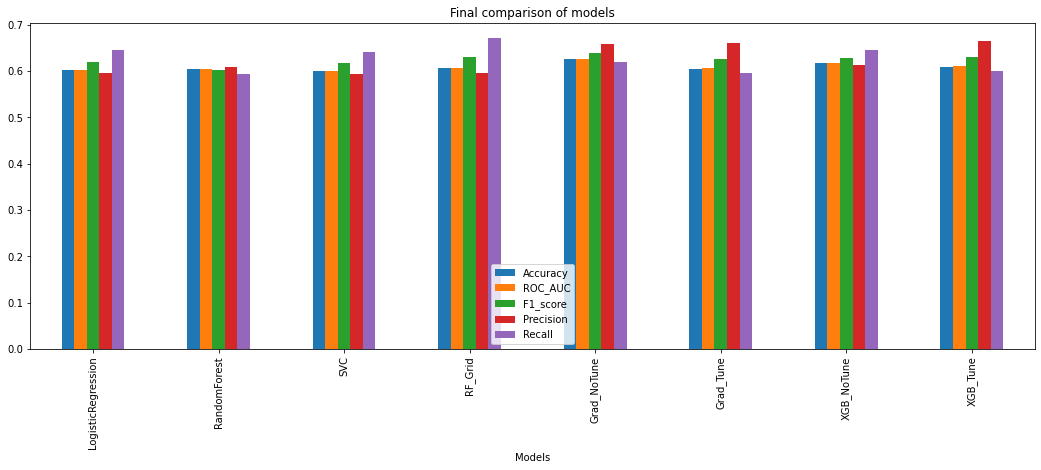

In [48]:
%matplotlib inline
title = "Final comparison of models"
my_path = os.getcwd()
refined_models.iloc[:,0:6].plot(kind = "bar", figsize = (18,6))
plt.title(title)
plt.xlabel("Models")
plt.xticks(ticks = refined_models.index, labels = list(refined_models.Model), rotation = "vertical")
plt.savefig(my_path + "\\saved_plots\\" + title + ".png")

### Model dump and load using pickle & joblib

In [22]:
import pickle

In [23]:
xgb_trained = pickle.dumps(xgbclf)

In [24]:
lnt_classifier = pickle.loads(xgb_trained)

In [25]:
y_pred = lnt_classifier.predict(X_test)

The best ROC curve we are able to achieve by far is this


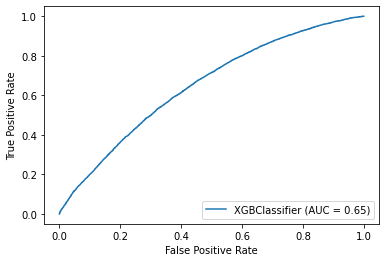

In [26]:
print("The best ROC curve we are able to achieve by far is this")
plot_roc_curve(lnt_classifier, X_test, y_test);

In [27]:
from sklearn.externals import  joblib

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [28]:
joblib.dump(xgbclf, "lnt_final_xgb.pkl")

['lnt_final_xgb.pkl']

In [29]:
lnt_classifier = joblib.load("lnt_final_xgb.pkl")

In [30]:
y_pred = lnt_classifier.predict(X_test)

The best ROC curve we are able to achieve by far is this


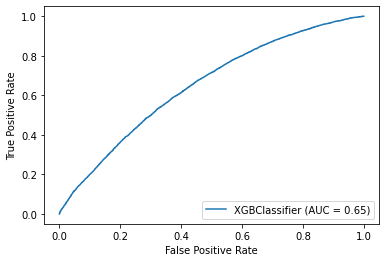

In [31]:
print("The best ROC curve we are able to achieve by far is this")
plot_roc_curve(lnt_classifier, X_test, y_test);